# Computer vision

Image can be really ambigue.

<img align="left" src="https://upload.wikimedia.org/wikipedia/en/d/dd/The_Persistence_of_Memory.jpg" />

## Image processing basics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage
from skimage.feature import hog
from skimage import data, color, exposure

In [2]:
image = cv2.imread('grant.jpg')
print u'Image dimensions: {}'.format(image.shape)
print u'Image range: {}, {}'.format(image.min(), image.max())
print u'Image data type {}'.format(image.dtype)

Image dimensions: (293, 550, 3)
Image range: 0, 255
Image data type uint8


### colormap conversion

opencv reads image in BGR format, while matplotlib in RGB

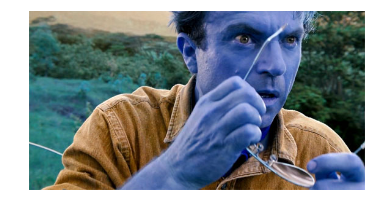

In [3]:
plt.axis('off')
plt.imshow(image)

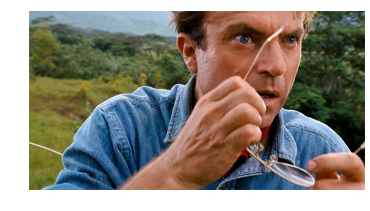

In [4]:
rgb = image[:, :, ::-1] 
plt.axis('off')
plt.imshow(rgb)

In [6]:
float_image = skimage.img_as_float(image) - 50
print u'Image dimensions: {}'.format(float_image.shape)
print u'Image range: {}, {}'.format(float_image.min(), float_image.max())
print u'Image data type {}'.format(float_image.dtype)

Image dimensions: (293, 550, 3)
Image range: -50.0, -49.0
Image data type float64


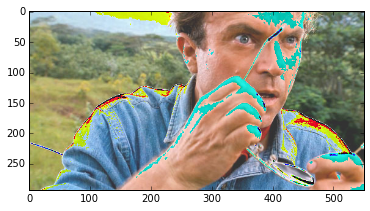

In [7]:
plt.imshow(float_image[:, :, ::-1])

Process image as gray scale

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print u'Image dimensions: {}'.format(gray.shape)
print u'Image range: {}, {}'.format(gray.min(), gray.max())
print u'Image data type {}'.format(gray.dtype)

Image dimensions: (293, 550)
Image range: 0, 254
Image data type uint8


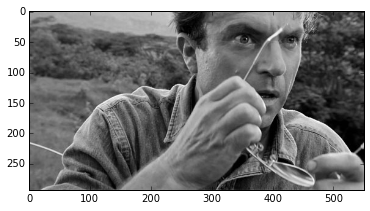

In [11]:
plt.imshow(gray, cmap='gray')

## Color extraction

It consists in extraction of the color regarding an image

In [15]:
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 255, 0, 255, 0, 255])
print hist.shape

(8, 8, 8)


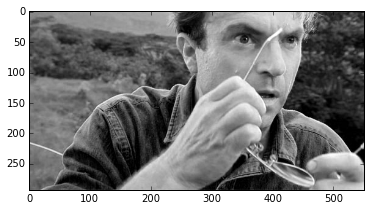

In [31]:
chans = cv2.split(image)
len(chans), chans[0].shape

plt.imshow(chans[2], cmap='gray')

In order to make simpler and faster analysis we analyse the channels individually or, the most used approach, we use convert to gray scale and compute one-channel histogram

flattened feature vector size: 768


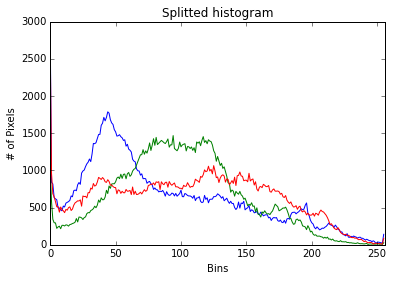

In [30]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("Splitted histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, c) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    # plot the histogram
    plt.plot(hist, color=c)
    plt.xlim([0, 256])
 

print "flattened feature vector size: %d" % (np.array(features).flatten().shape)

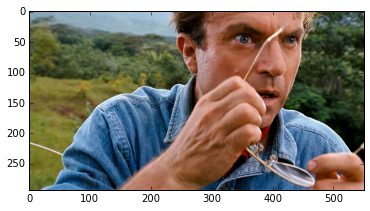

In [46]:
plt.imshow(image[:,:,::-1])

(0, 256)

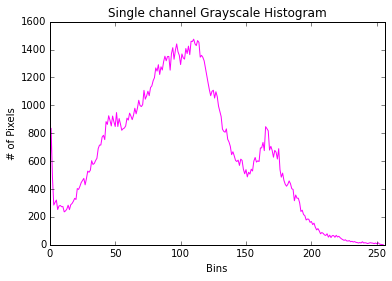

In [40]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Single channel Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist, color='magenta')
plt.xlim([0, 256])

## Shape descriptor

The most used method is HOG. It divides the image into blocks then compute orientation of histogram in each of these blocks

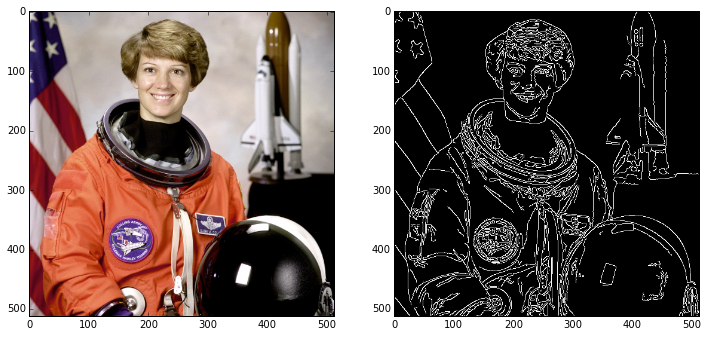

In [52]:
grd = cv2.Canny(data.astronaut(), 100, 200)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(data.astronaut())
plt.subplot(122)
plt.imshow(grd, cmap='gray')

In [54]:
image = color.rgb2gray(data.astronaut())
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True)

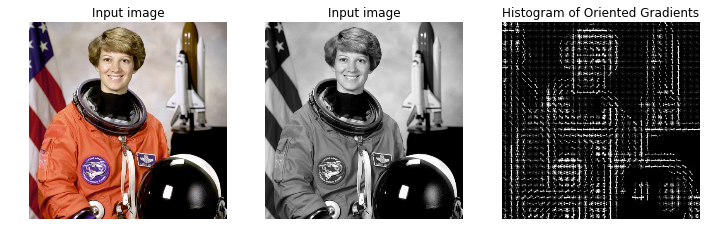

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(data.astronaut())
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(image, cmap='gray')
ax2.set_title('Input image')
ax2.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax3.axis('off')
ax3.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax3.set_title('Histogram of Oriented Gradients')
ax3.set_adjustable('box-forced')
plt.show()

## Local descriptors

Three steps are necessary to use local descriptors:
    
1. detect keypoints;
1. compute descriptors;
1. matching descriptors;

### detecting keypoints

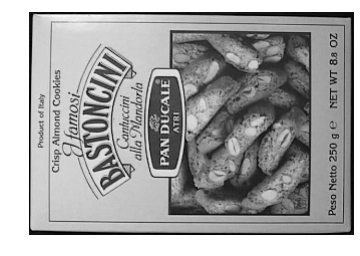

In [56]:
im1 = cv2.imread('box.png', 0)

plt.axis('off')
plt.imshow(im1, cmap='gray')

In [102]:
sift = cv2.SIFT()
kp = sift.detect(im1, None)
print 'detected {} keypoints'.format(len(kp))

detected 604 keypoints


In [103]:
print 'coordinates', kp[0].pt
print 'size', kp[0].size
print 'angle', kp[0].angle
print 'octave', kp[0].octave
print 'response', kp[0].response

coordinates (279.60809326171875, 22.067058563232422)
size 1.95822012424
angle 273.286437988
octave 6226431
response 0.0571596994996


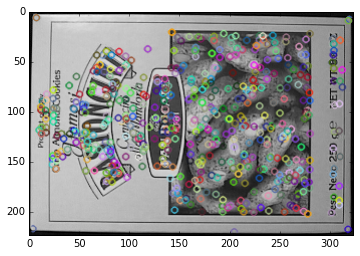

In [104]:
dr = cv2.drawKeypoints(im1, kp)
plt.imshow(dr)

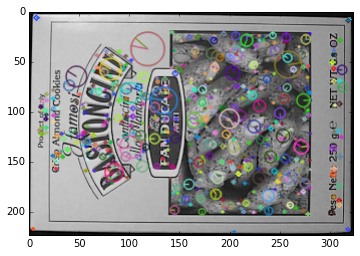

In [105]:
dr = cv2.drawKeypoints(im1, kp, flags=4)
plt.imshow(dr)

### compute descriptors

for each keypoint we compute the corresponding detector (128 dimensions)

In [106]:
_, det = sift.compute(im1, kp, None)
print 'keypoints size:', len(kp)
print 'detector size:', det.shape

keypoints size: 604
detector size: (604, 128)


### matching descriptors

Matching descriptors between two distinct images

In [107]:
# im2 = cv2.imread('box_in_scene.png', 0)
im2 = cv2.imread('grant.jpg', 0)

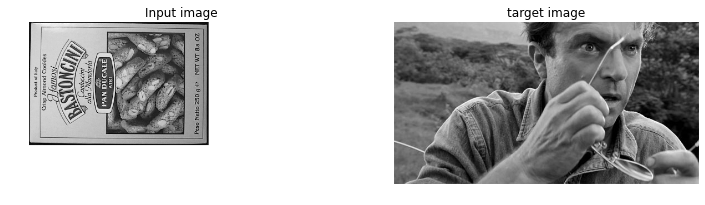

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(im1, cmap='gray')
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(im2, cmap='gray')
ax2.set_title('target image')
ax2.set_adjustable('box-forced')

In [109]:
kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)
print des1.shape, des2.shape

(604, 128) (1104, 128)


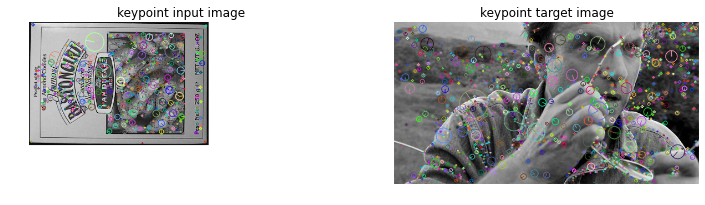

In [110]:
# plot
dr1 = cv2.drawKeypoints(im1, kp1, flags=4)
dr2 = cv2.drawKeypoints(im2, kp2, flags=4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(dr1)
ax1.set_title('keypoint input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(dr2)
ax2.set_title('keypoint target image')
ax2.set_adjustable('box-forced')

In [112]:
bf = cv2.BFMatcher(crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
 # Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [113]:
try:
    # Draw first 10 matches.
    img3 = cv2.drawMatches(im1, kp1, im2, kp2, matches[:10], flags=2)

    plt.imshow(img3)
    plt.show()
except:
    print 'Not implemmented'

Not implemmented


In [114]:
def drawMatches(im1, kp1, im2, kp2, matches):
    h1, w1 = im1.shape[:2]
    h2, w2 = im2.shape[:2]
    
    view = np.zeros(shape=(max(h1, h2), w1 + w2), dtype=np.uint8)
    view[:h1, :w1] = im1
    view[:h2, w1:] = im2
        
    for m in matches:
        color = 255 
        x1, y1 = map(int, kp1[m.queryIdx].pt)
        x2, y2 = map(int, kp2[m.trainIdx].pt)
        cv2.circle(view, (x1, y1), 5, color)
        cv2.circle(view, (x2 + w1, y2), 5, color)
        cv2.line(view, (x1, y1), (x2 + w1, y2), color)
        
    return view

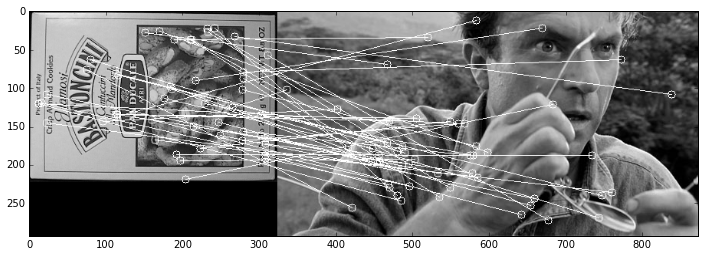

In [116]:
img3 = drawMatches(im1, kp1, im2, kp2, matches[:50])

plt.figure(figsize=(12, 8))
plt.imshow(img3, cmap='gray')
plt.show()